# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [2]:
# Import necessary libraries 🔧
# 🔧 Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧
file_path = '/content/listings.csv.gz'
df = pd.read_csv(file_path)

# 🧾 Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9691 non-null   int64  
 1   listing_url                                   9691 non-null   object 
 2   scrape_id                                     9691 non-null   int64  
 3   last_scraped                                  9691 non-null   object 
 4   source                                        9691 non-null   object 
 5   name                                          9691 non-null   object 
 6   description                                   9476 non-null   object 
 7   neighborhood_overview                         4953 non-null   object 
 8   picture_url                                   9691 non-null   object 
 9   host_id                                       9691 non-null   i

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56766,https://www.airbnb.com/rooms/56766,20250615022803,2025-06-26,city scrape,"Duplex avec vue, centre ville",Beautifull duplex terrace on Lyon's roofs ! Co...,"the general atmosphere, the magnificent archit...",https://a0.muscache.com/pictures/hosting/Hosti...,269557,...,4.88,4.86,4.61,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,0.31
1,77104,https://www.airbnb.com/rooms/77104,20250615022803,2025-06-25,city scrape,Nice Flat in the center of Lyon,NaN,NaN,https://a0.muscache.com/pictures/518769/186679...,411285,...,5.00,4.88,4.85,6938113058353,f,1,1,0,0,0.15
2,134539,https://www.airbnb.com/rooms/134539,20250615022803,2025-06-26,city scrape,"Centre of old town,home sweet home",Ideal situation and cosy..In the center of the...,It's more than charming!<br />It's the most be...,https://a0.muscache.com/pictures/miso/Hosting-...,660135,...,4.61,4.86,4.44,6938513221658,f,1,1,0,0,0.79
3,137132,https://www.airbnb.com/rooms/137132,20250615022803,2025-06-26,city scrape,"Bel apartment, 2 rooms, Lyon center","- Nice 2 rooms apartment, on the 6th and last ...",Four very nice: residential but with lots of r...,https://a0.muscache.com/pictures/1085278/6420e...,670404,...,4.84,4.95,4.53,0693861800177,f,1,1,0,0,0.12
4,174304,https://www.airbnb.com/rooms/174304,20250615022803,2025-06-26,city scrape,Quartier Terreaux 4/6 pers. Hyper centre / Clim,"In a typical Lyonnais building, this beautiful...",A prime location in the center of the city of ...,https://a0.muscache.com/pictures/2c68bbca-08dd...,832917,...,4.86,4.88,4.56,6938112368465,f,2,2,0,0,2.93


## 2. Explore Missing Values

Business framing:  

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:

- Count missing values in each column
- Visualize missingness if helpful (e.g., heatmap, barplot)
- Flag columns that might not be usable due to missing data

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



Top columns with missing values:
neighbourhood_group_cleansed    9691
calendar_updated                9691
host_about                      5814
host_neighbourhood              5550
neighbourhood                   4738
neighborhood_overview           4738
host_response_rate              4651
host_response_time              4651
beds                            4212
price                           4205
dtype: int64


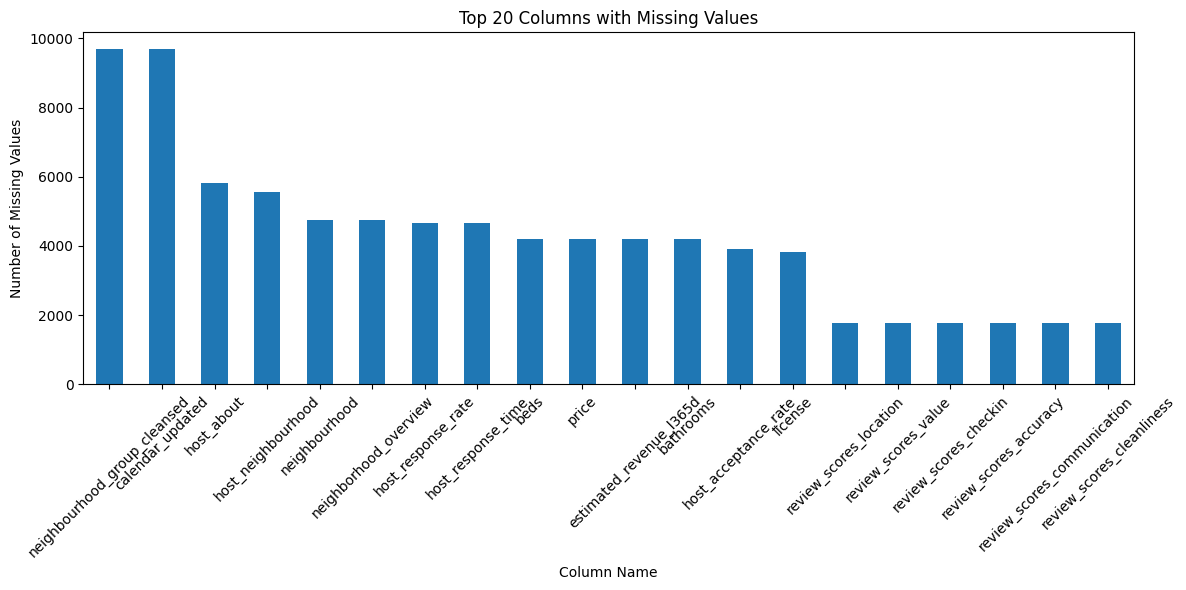

In [6]:
# Add code here 🔧
# Count missing values per column
missing_counts = df.isnull().sum().sort_values(ascending=False)

# Display top 10 columns with most missing values
print("Top columns with missing values:")
print(missing_counts.head(10))

# Visualize missing values (barplot)
plt.figure(figsize=(12, 6))
missing_counts[missing_counts > 0].head(20).plot(kind='bar')
plt.title('Top 20 Columns with Missing Values')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### ✍️ Your Response: 🔧

1. The top 3 columns with the most missing values are neighbourhoodgroupcleansed, calendarupdated, and hostabout.

2. I think that the ones that will cause business issues are price and beds, this is because they are very critical. We do not want and cannot have missing values here, gaps in these fields can mislead future models and forecasts that will be created.

3. I think that calendarupdated is something that could absolutely be safely dropped. This is something that is not super optimal and something that could be done without.


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In your markdown:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [7]:
# Add code here 🔧
columns_to_drop = [
    'license',
    'calendar_updated',
    'neighbourhood_group_cleansed',
    'host_about'
]

df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned.info()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9691 non-null   int64  
 1   listing_url                                   9691 non-null   object 
 2   scrape_id                                     9691 non-null   int64  
 3   last_scraped                                  9691 non-null   object 
 4   source                                        9691 non-null   object 
 5   name                                          9691 non-null   object 
 6   description                                   9476 non-null   object 
 7   neighborhood_overview                         4953 non-null   object 
 8   picture_url                                   9691 non-null   object 
 9   host_id                                       9691 non-null   i

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56766,https://www.airbnb.com/rooms/56766,20250615022803,2025-06-26,city scrape,"Duplex avec vue, centre ville",Beautifull duplex terrace on Lyon's roofs ! Co...,"the general atmosphere, the magnificent archit...",https://a0.muscache.com/pictures/hosting/Hosti...,269557,...,4.78,4.88,4.86,4.61,f,1,1,0,0,0.31
1,77104,https://www.airbnb.com/rooms/77104,20250615022803,2025-06-25,city scrape,Nice Flat in the center of Lyon,NaN,NaN,https://a0.muscache.com/pictures/518769/186679...,411285,...,4.96,5.00,4.88,4.85,f,1,1,0,0,0.15
2,134539,https://www.airbnb.com/rooms/134539,20250615022803,2025-06-26,city scrape,"Centre of old town,home sweet home",Ideal situation and cosy..In the center of the...,It's more than charming!<br />It's the most be...,https://a0.muscache.com/pictures/miso/Hosting-...,660135,...,4.72,4.61,4.86,4.44,f,1,1,0,0,0.79
3,137132,https://www.airbnb.com/rooms/137132,20250615022803,2025-06-26,city scrape,"Bel apartment, 2 rooms, Lyon center","- Nice 2 rooms apartment, on the 6th and last ...",Four very nice: residential but with lots of r...,https://a0.muscache.com/pictures/1085278/6420e...,670404,...,4.89,4.84,4.95,4.53,f,1,1,0,0,0.12
4,174304,https://www.airbnb.com/rooms/174304,20250615022803,2025-06-26,city scrape,Quartier Terreaux 4/6 pers. Hyper centre / Clim,"In a typical Lyonnais building, this beautiful...",A prime location in the center of the city of ...,https://a0.muscache.com/pictures/2c68bbca-08dd...,832917,...,4.83,4.86,4.88,4.56,f,2,2,0,0,2.93


### ✍️ Your Response: 🔧
1. I dropped license, calendarupdated, neighbourhoodgroupcleansed, and hostabout.

2. I dropped these columns because they were either missing tons of values, had no structure, or duplicated information already available. These columns offered me little value for future models or graphs that I will create in this assignment.

3. Leaving them in could clutter dashboards, confuse people, or lead to misleading infomration. People may interpret useless fields are useful and this would cause a lot of problems. Excessive missing values could also introduce new errors when we are tyring to use the data to create new information.



## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your markdown:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [12]:
# Your code for converting column data types 🔧
import numpy as np

# Convert price to number (remove $ and commas)
df_cleaned['price'] = df_cleaned['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Replace 0s and missing prices with median price
price_median = df_cleaned['price'].median()
df_cleaned['price'] = df_cleaned['price'].replace(0, np.nan)
df_cleaned['price'] = df_cleaned['price'].fillna(price_median)

# Flag listings where price was originally missing or 0
df_cleaned['price_was_missing'] = df_cleaned['price'].isna()

# Fill missing review scores with the average score (only if they have reviews)
review_avg = df_cleaned['review_scores_rating'].mean()
df_cleaned['review_scores_rating'] = df_cleaned['review_scores_rating'].fillna(review_avg)

# Flag which review scores were filled
df_cleaned['review_score_was_missing'] = df_cleaned['review_scores_rating'].isna()

# Preview changes
df_cleaned[['price', 'price_was_missing', 'review_scores_rating', 'review_score_was_missing']].head()





,price,price_was_missing,review_scores_rating,review_score_was_missing
0,121.0,False,4.70,False
1,90.0,False,4.76,False
2,83.0,False,4.48,False
3,88.0,False,4.78,False
4,189.0,False,4.63,False


### ✍️ Your Response: 🔧

1. I cleaned the price column and the reviewscoresrating column.

2. For price, I removed formatting and filled missing or zero values using the median price to keep values realistic. For reviewscoresrating I used the average score to fill in missing values so that listing with reviews could still be included in dashboards without being blank.

3. Using the median or average can smooth out real differences between listings, this might hide patterns based on location, quality, or host behavior. There is also a risk of giving a false impression of quality if missing review scores are filled without knowing why they were missing in the first place.


## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In your markdown:
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


count    9625.000000
mean        1.109506
std         0.383454
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: bathrooms_num, dtype: float64
bathroom_shared
False    8549
True     1142
Name: count, dtype: int64


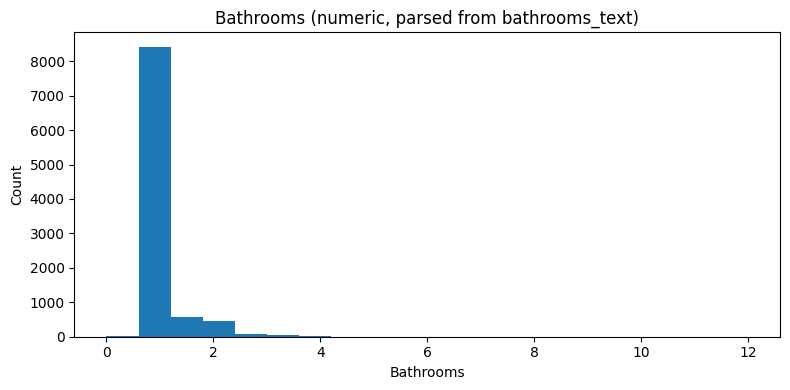

In [13]:
# Clean or adjust your dataset 🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_cleaned['bathrooms_num'] = (
    df_cleaned['bathrooms_text']
    .astype(str)
    .str.extract(r'(\d+(?:\.\d+)?)')[0]
    .astype(float)
)

df_cleaned['bathroom_shared'] = df_cleaned['bathrooms_text'].str.contains('shared', case=False, na=False)
df_cleaned['bathrooms_parse_ok'] = df_cleaned['bathrooms_num'].notna()

print(df_cleaned['bathrooms_num'].describe())
print(df_cleaned['bathroom_shared'].value_counts(dropna=False))

plt.figure(figsize=(8,4))
df_cleaned['bathrooms_num'].dropna().plot(kind='hist', bins=20)
plt.title('Bathrooms (numeric, parsed from bathrooms_text)')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



### ✍️ Your Response: 🔧
1. The column that I fixed was bathroomstext, which did not have a clear usable numbers across all rows.

2. I found the number portion and put them into a new column and created a seperate flag to indicate whether the listing had shared bathrooms. I also summarized and plotted the results to confirm the coversion worked.

3. Cleaning this column allows us to use bathroom counts in numeric analysis that people or I may do in the future. Seperating shared vs private bathrooms also adds a valuable feature for the dataset and can allow for better recommendation systems in the future for customers.

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for exact duplicate rows
- Also check for duplicate IDs if a unique ID column exists
- Remove duplicates if found and explain your reasoning

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [15]:
# Add code here 🔧
import pandas as pd

rows_before = len(df_cleaned)

exact_row_dups = df_cleaned.duplicated(keep=False).sum()
df_norowdups = df_cleaned.drop_duplicates()

if 'id' in df_norowdups.columns:
    for c in ['last_scraped', 'calendar_last_scraped', 'last_review']:
        if c in df_norowdups.columns:
            df_norowdups[c] = pd.to_datetime(df_norowdups[c], errors='coerce')
    sort_cols = [c for c in ['last_scraped', 'calendar_last_scraped', 'last_review', 'number_of_reviews'] if c in df_norowdups.columns]
    df_sorted = df_norowdups.sort_values(by=sort_cols, ascending=False) if sort_cols else df_norowdups
    id_dups = df_sorted.duplicated(subset=['id']).sum()
    df_dedup = df_sorted.drop_duplicates(subset=['id'], keep='first')
else:
    id_dups = 0
    df_dedup = df_norowdups.copy()

rows_after = len(df_dedup)
print({"exact_row_duplicates": int(exact_row_dups), "duplicate_ids": int(id_dups),
       "rows_before": rows_before, "rows_after": rows_after})

df_dedup.head()


{'exact_row_duplicates': 0, 'duplicate_ids': 0, 'rows_before': 9691, 'rows_after': 9691}


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,price_filled,price_imputed,review_scores_filled,review_status,review_score_imputed,price_was_missing,review_score_was_missing,bathrooms_num,bathroom_shared,bathrooms_parse_ok
2387,21522181,https://www.airbnb.com/rooms/21522181,20250615022803,2025-06-27,city scrape,"""La Loge De l'Opéra"" Appartement avec vue",The charm of the old with modern and air-condi...,"Ideally located in the center of Lyon, the apa...",https://a0.muscache.com/pictures/82aebd09-6301...,156408212,...,124.0,False,4.87,has_reviews,False,False,False,1.0,False,True
890,8958666,https://www.airbnb.com/rooms/8958666,20250615022803,2025-06-27,city scrape,Cosy room*** on the Rhone river,The apartment is located in the heart of multi...,"The district of ""Guillotière"" is facing the ci...",https://a0.muscache.com/pictures/8ed5cc01-ec7d...,12463926,...,46.0,False,4.96,has_reviews,False,False,False,1.0,True,True
8542,1257687001918799175,https://www.airbnb.com/rooms/1257687001918799175,20250615022803,2025-06-27,city scrape,Le cocon : cœur part Dieu,"☀️Ideally located in the center of Lyon, our c...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,13225223,...,69.0,False,4.84,has_reviews,False,False,False,1.0,False,True
5417,53553997,https://www.airbnb.com/rooms/53553997,20250615022803,2025-06-27,city scrape,Lyon : Chambre privée dans appartement moderne,"For a short stopover in the capital of Gaul, I...","Quiet, wooded neighborhood, secure building",https://a0.muscache.com/pictures/hosting/Hosti...,433674907,...,41.0,False,4.97,has_reviews,False,False,False,1.0,True,True
4981,49936492,https://www.airbnb.com/rooms/49936492,20250615022803,2025-06-27,city scrape,"Bright duplex near Tête d'Or, Lyon 6th","Superb bright 48 sqm duplex, located in the 6...","The duplex is located in the center of Lyon, i...",https://a0.muscache.com/pictures/50e2e36f-7625...,291015206,...,73.0,False,4.53,has_reviews,False,False,False,1.0,False,True


### ✍️ Your Response: 🔧 🔧
1. No there was no exacy duplicate rows or listing IDs in the dataset.

2. If duplicates had been found, I would have kept the most recent version of each listing and dropped the rest.

3. They can infalte metrics and give weight to values that should not have weight. This can lead to bad data and user confusion.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Make sure your cleaned DataFrame is named appropriately
# For example, if your cleaned dataset is stored in a DataFrame called 'df_cleaned':

# Export the cleaned DataFrame to a CSV file
df_cleaned.to_csv("cleaned_airbnb_data.csv", index=False)

# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually)

```





In [16]:
# export csv here 🔧
# Final cleaned dataset
df_cleaned.to_csv("cleaned_airbnb_data.csv", index=False)


## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. Fixing the price column was tricky becuase of the dollar signs and commas, additionally, there was a lot of missing values in review scores.
2. I kept important columns like price and fixed missing values when possible. I dropped rows only when there was too much missing information.
3. A pricing team could use it to set better pries for AirBnB units. Also, hosts could use it to improve their listings based on review data.
4. Id like to look more into missing location infor, and maybe clean some other fields to a higher level, potentially utilizing machine learning.
5. This helped me practice real data cleaning skills. I feel more confident preparing messy data and knowing what to look for and how to execute it for analysis.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [17]:
!jupyter nbconvert --to html "assignment_06_WoodMason.ipynb"

[NbConvertApp] Converting notebook assignment_06_WoodMason.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 507217 bytes to assignment_06_WoodMason.html
